---
title: "Visualizar dos variables cuantitativas"
---

En este capíulo, crearás y personalizarás gráficos que visualizan la relación entre dos variables cuantitativas. Para ello, utilizarás gráficos se dispersión y de líneas para explorar cómo cambia el nivel de contaminación atmosférica en una ciudad a lo largo de un día y cómo se relacionan los caballos de potencia con la eficiencia del combustible en los coches. También verás otra gran ventaja de utilizar Seaborn: ¡la posibilidad de crear fácilmente subtramas en una sola figura!

## Introducción a las plots (tramas) y subplots (subtramas) relacionales

-   Gráficos relacionales

    -   Altura vs Peso
    -   Número de ausencias de un alumno vs Nota final
    -   GDP vs Personas que saben leer y escribir

-   Intruducción a relplot()

    -   Crea gráficos relacionales: scatterplots o line plots

    -   ¿Por qué usar `relplot()` en lugar de `scatterplot()`?

        -   `relplot()` permite crear subgráficos en una sola figura.

-   Scatterplot() vs relplot()

In [1]:
# para poder mostrar el dataset en los ejemplos
import pandas as pd
tips = pd.read_csv('./data/tips.csv')

    -   Usando `scatterplot()`

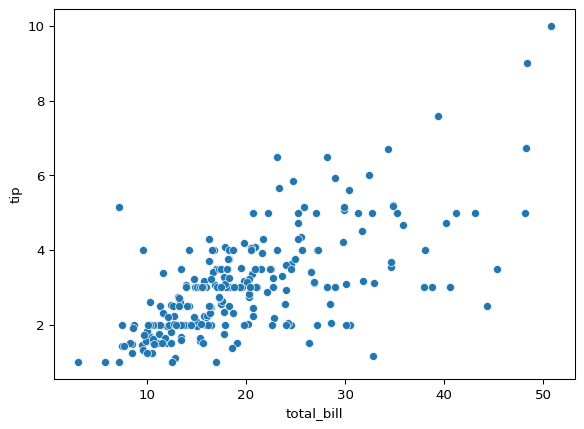

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='total_bill',
                y='tip',
                data=tips)
plt.show()

    -   Usando `relplot()`

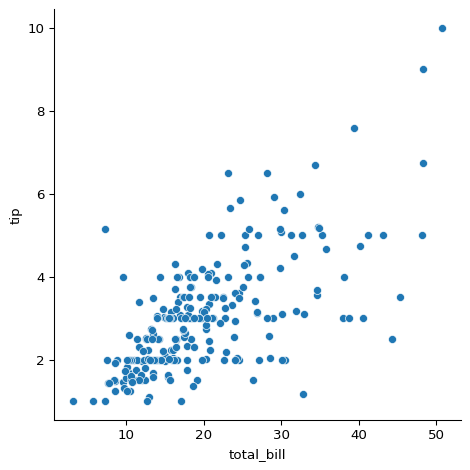

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(x='total_bill',
            y='tip',
            data=tips,
            kind='scatter')
plt.show()

-   Subplots en columnas

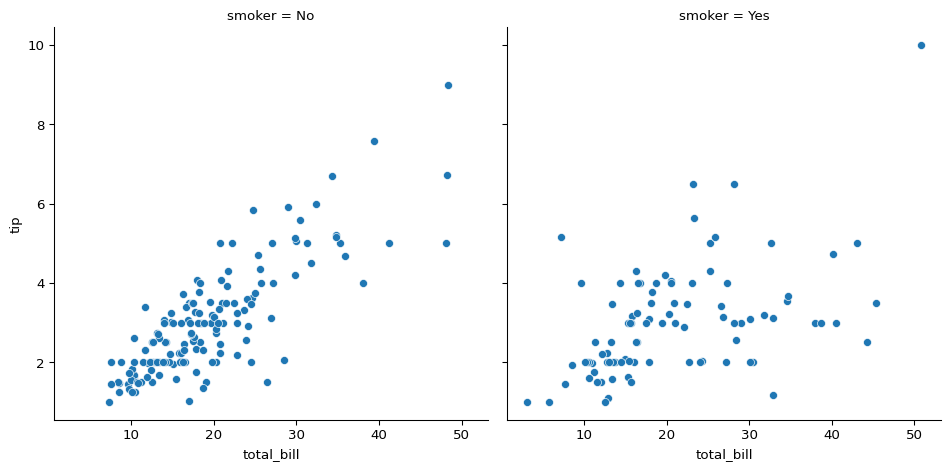

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(x='total_bill',
            y='tip',
            data=tips,
            kind='scatter',
            col='smoker')
plt.show()

-   Subplots en filas

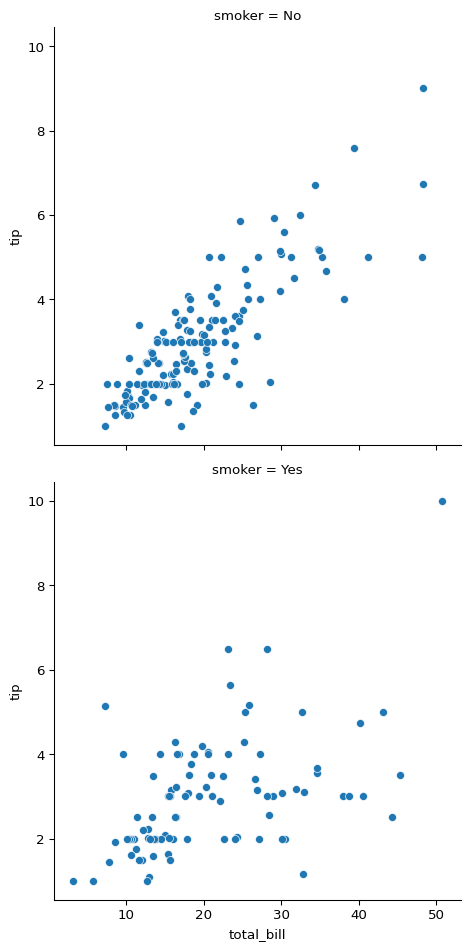

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(x='total_bill',
            y='tip',
            data=tips,
            kind='scatter',
            row='smoker')
plt.show()

-   Subplots en filas y columnas

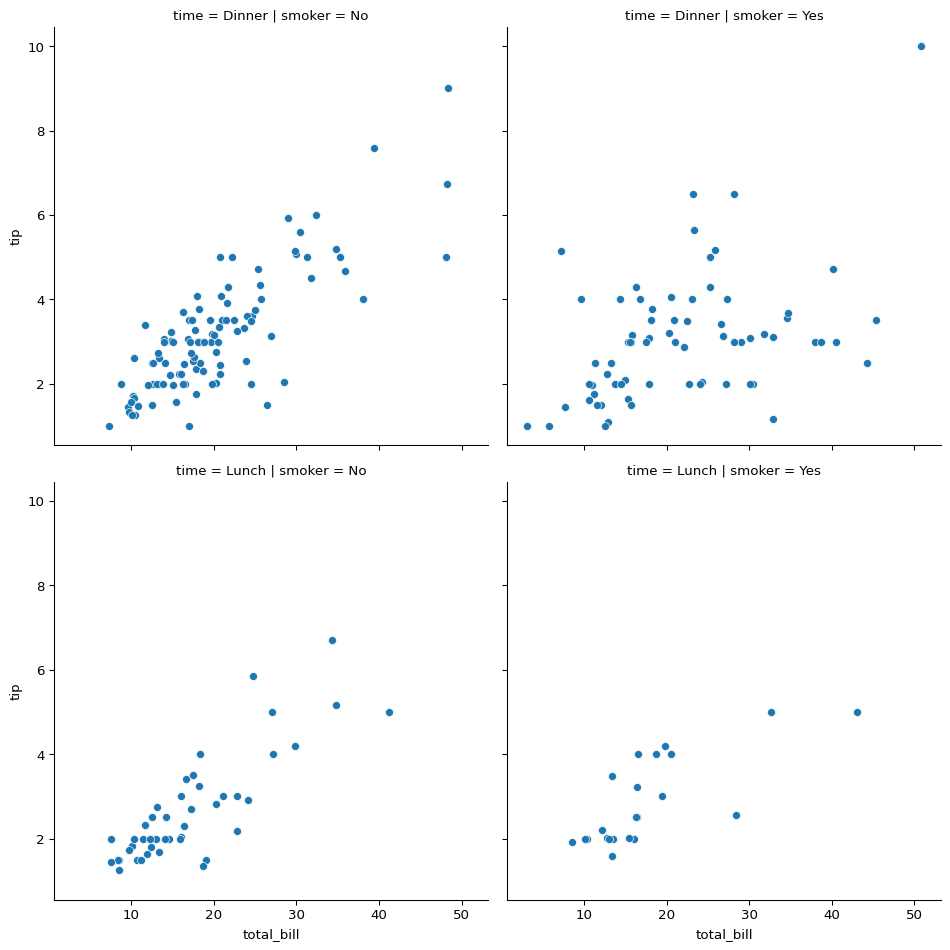

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(x='total_bill',
            y='tip',
            data=tips,
            kind='scatter',
            col='smoker',
            row='time')
plt.show()

-   Subgrupos por día de la semana

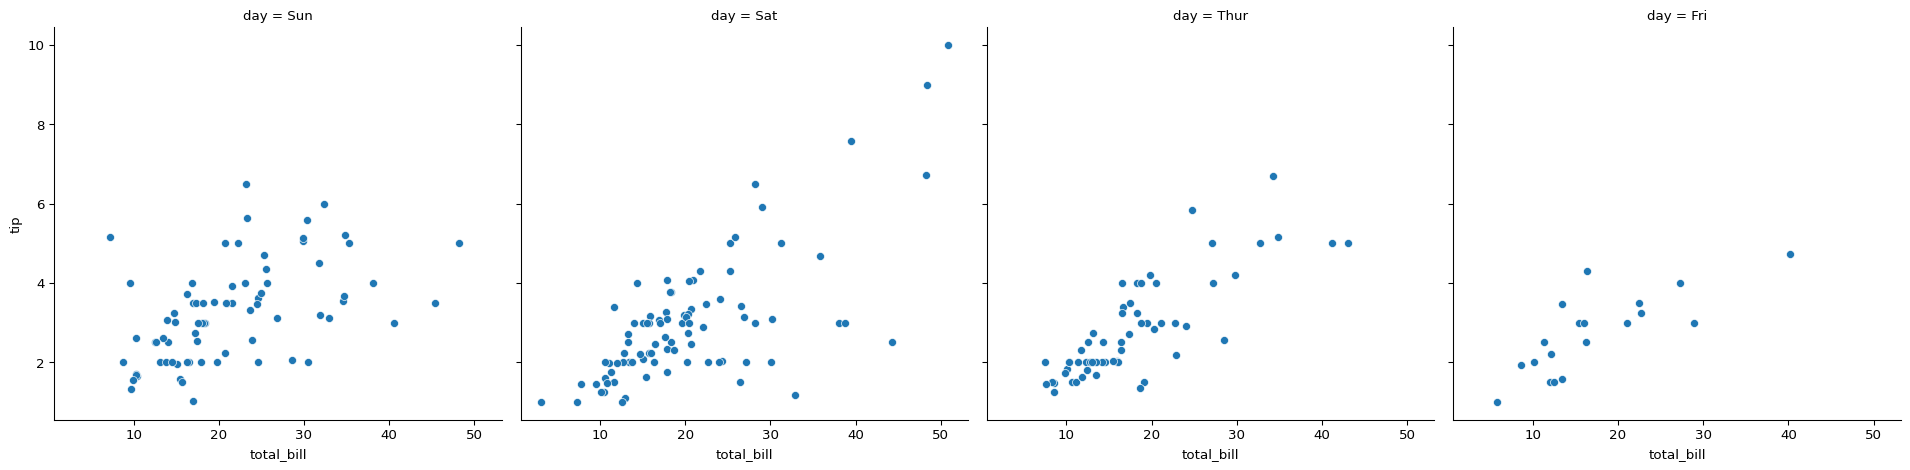

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(x='total_bill',
            y='tip',
            data=tips,
            kind='scatter',
            col='day')
plt.show()

El gráfico se ve pequeño si todos estan en la misma fila

-   Wrapping columns
    -   Se pueden establecer dos gráficos por fila

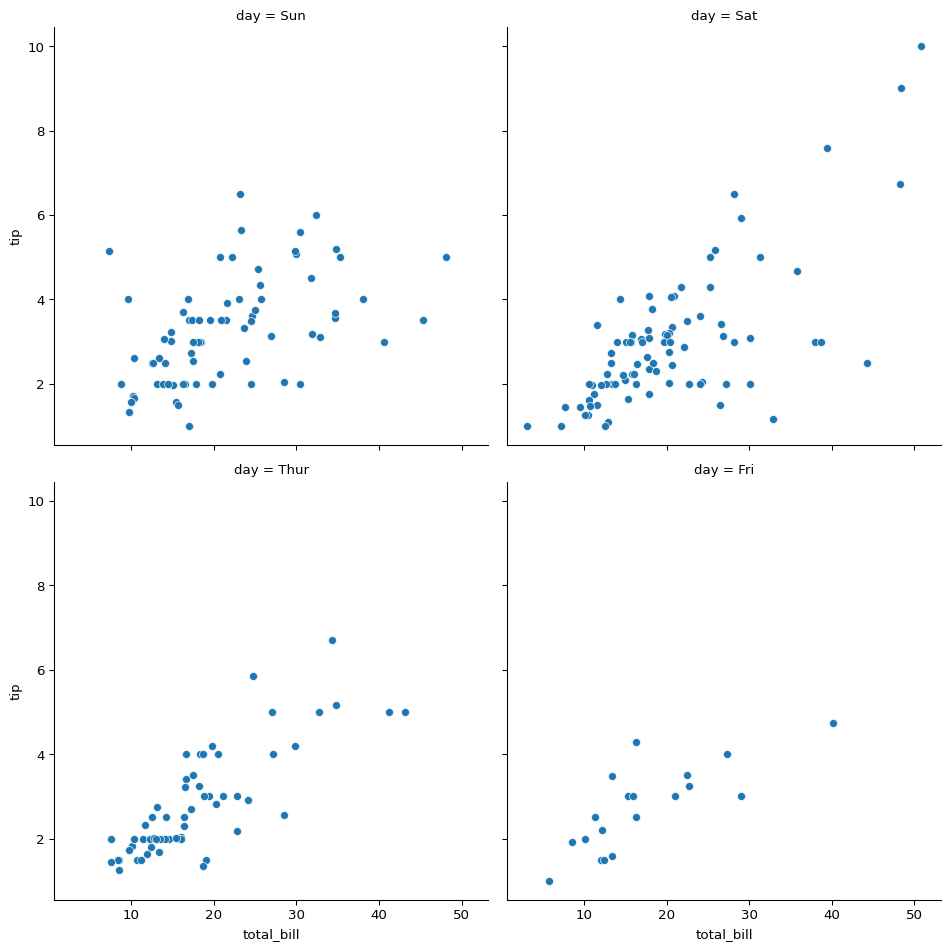

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(x='total_bill',
            y='tip',
            data=tips,
            kind='scatter',
            col='day',
            col_wrap=2)
plt.show()

-   Orden de las columnas

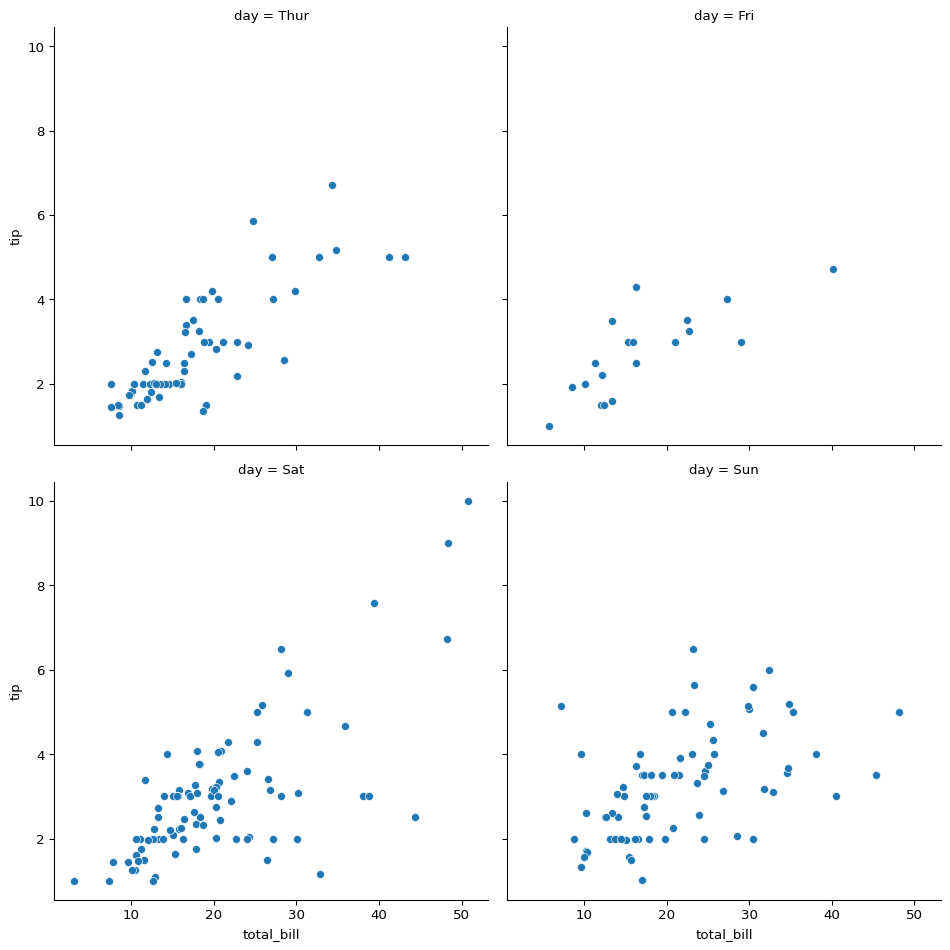

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(x='total_bill',
            y='tip',
            data=tips,
            kind='scatter',
            col='day',
            col_wrap=2,
            col_order=['Thur',
                       'Fri',
                       'Sat',
                       'Sun'])
plt.show()

### Crear subtramas con columna y fila

Hemos visto en ejercicios anteriores que los alumnos con más faltas (`"absences"`) tienden a tener notas finales más bajas (`"G3"`). ¿Se mantiene esta relación independientemente de cuánto tiempo estudien los alumnos cada semana?

Para responder a esto, observaremos la relación entre el número de faltas de asistencia a clase de un alumno y su calificación final en el curso, creando subtramas separadas en función del tiempo de estudio semanal de cada alumnos (`"study_time"`).

In [10]:
import pandas as pd
student_data = pd.read_csv('./data/student-alcohol-consumption.csv', index_col=0)
student_data.head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,GP,F,18,GT3,A,4,4,2,0,yes,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,GP,F,17,GT3,T,1,1,1,0,no,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,GP,F,15,LE3,T,1,1,1,3,yes,...,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,GP,F,15,GT3,T,4,2,1,0,no,...,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,GP,F,16,GT3,T,3,3,1,0,no,...,2,1,2,5,4,6,10,10,Urban,2 to 5 hours


#### Instrucciones

1.  Modifica el código paora utilizar `relplot()` en lugar de `scatterplot()`.

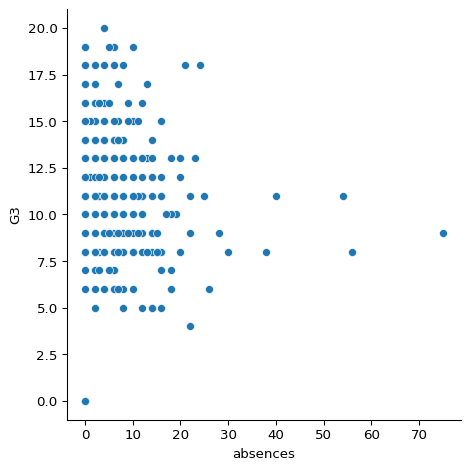

In [11]:
# Change to use relplot() instead of scatterplot()
sns.relplot(x='absences', y='G3',
            data=student_data,
            kind='scatter')

# Show plot
plt.show()

2.  Modifica el código para crear un gráfico de dispersión para cada nivel de la variable `"study_time"`, ordenado en columnas.

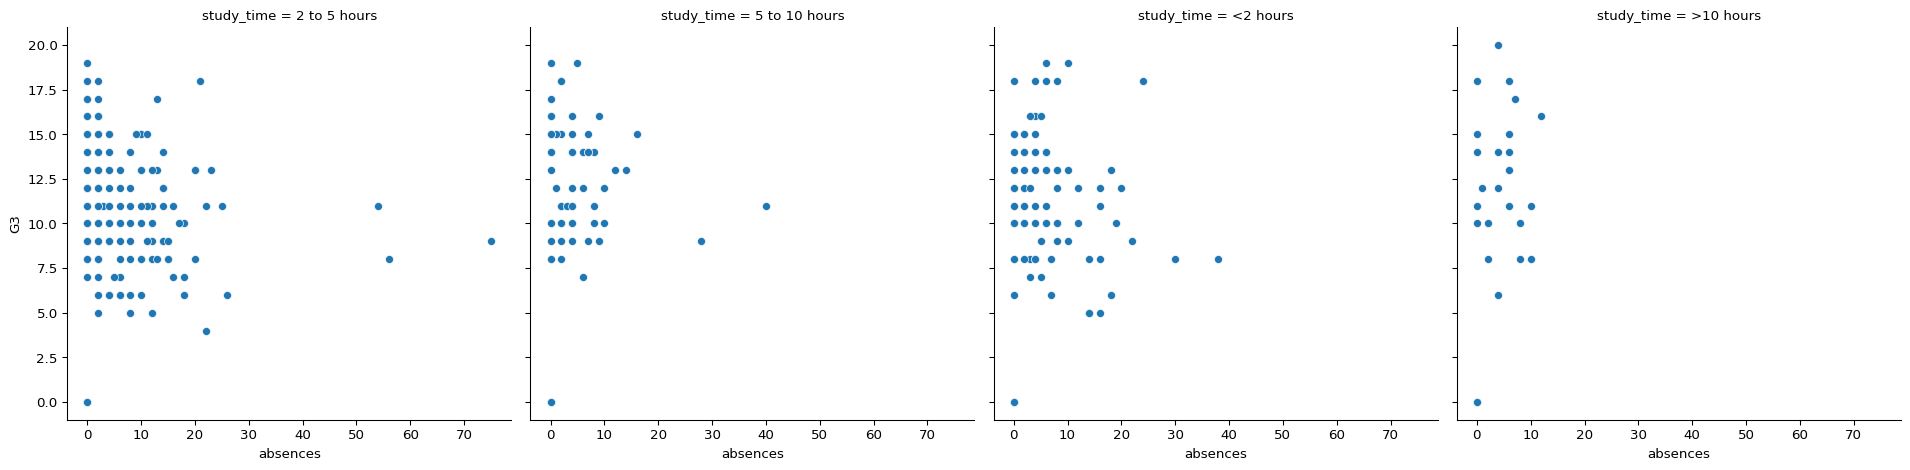

In [12]:
# Change to make subplots based on study time
sns.relplot(x='absences', y='G3',
            data=student_data,
            kind='scatter',
            col='study_time')
# Show plot
plt.show()

3.  Adapta tu código para crear un gráfico de dispersión para cada nivel del tiempo de estudio semanal de un alumno, esta vez ordenado en filas.

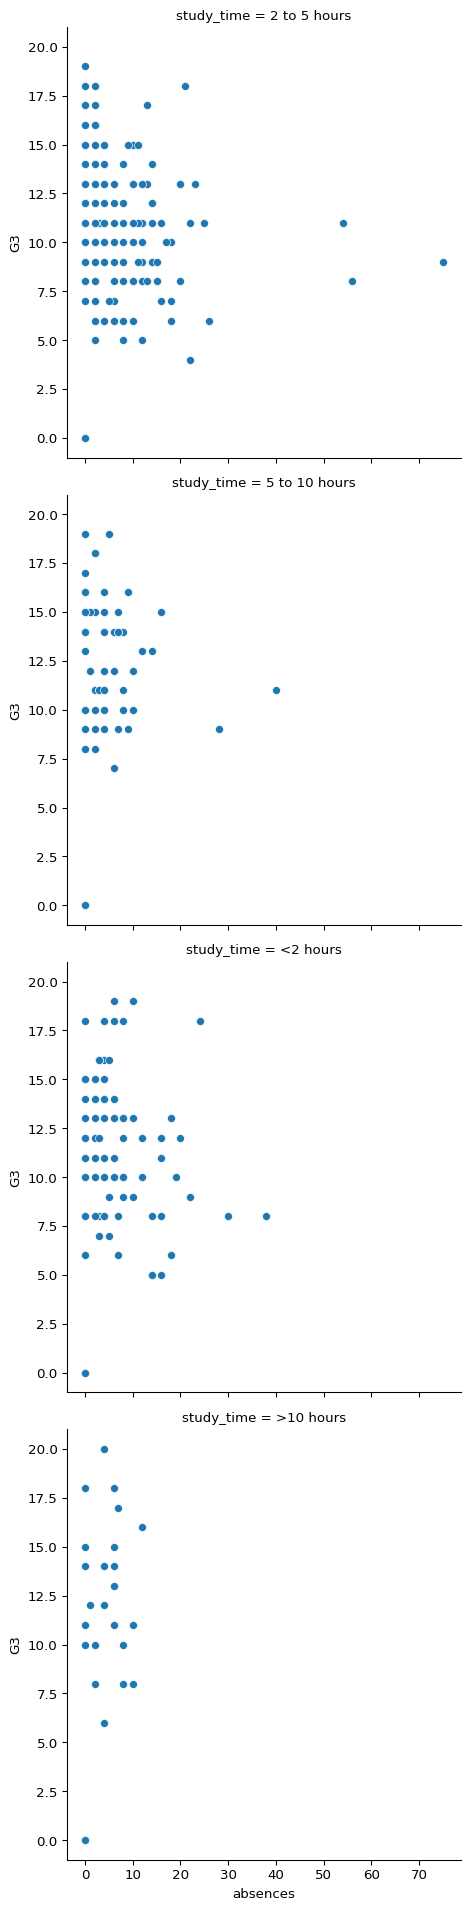

In [13]:
# Change this scatter plot to arrange the plots in rows instead of columns
sns.relplot(x='absences', y='G3',
            data=student_data,
            kind='scatter',
            row='study_time')
# Show plot
plt.show()

Debido a que estos subgráficos tenían un gran rango de valores x, es más fácil leerlos dispuestos en filas en lugar de columnas.

### Crear subtramas de dos factores

Sigamos examinando el conjunto de datos `student_data` de alumnos de secundaria. Aquí queremos responder a la siguiente pregunta: ¿la nota del primer semestre de un alumno (`"G1"`) tiende a correlacionarse con su nota final (`"G3"`)?

Hay muchos aspectos de la vida de un alumno que pueden dar lugar a una nota final más alta o más baja en la clase. Por ejemplo, algunos alumnos reciben apoyo educativo adicional de su centro escolar (`"schoolsup"`) o de su familia (`"famsup"`), lo que podría traducirse en mejores notas. Intentamos controlar estos dos factores creando subtramas en función de si el alumno recibió apoyo educativo adicional de su escuela o de su familia.

#### Instrucciones

1.  Utiliza `relplot()` para crear un gráfico de dispersión con `"G1"` en el eje x y `"G3"` en el eje y, utilizando el DataFrame `student_data`

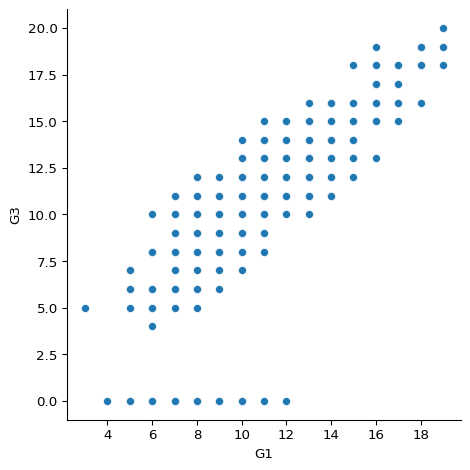

In [14]:
# Create a scatter plot fo G1 vs. G3
sns.relplot(x='G1', y='G3',
            data=student_data,
            kind='scatter',
            )
# Show plot
plt.show()

2.  Crea subtramas **de columnas** en función de su el alumno recibió ayuda de la escuela (`"schoolsup"`), ordenadas de forma que "si" vaya antes que "no".

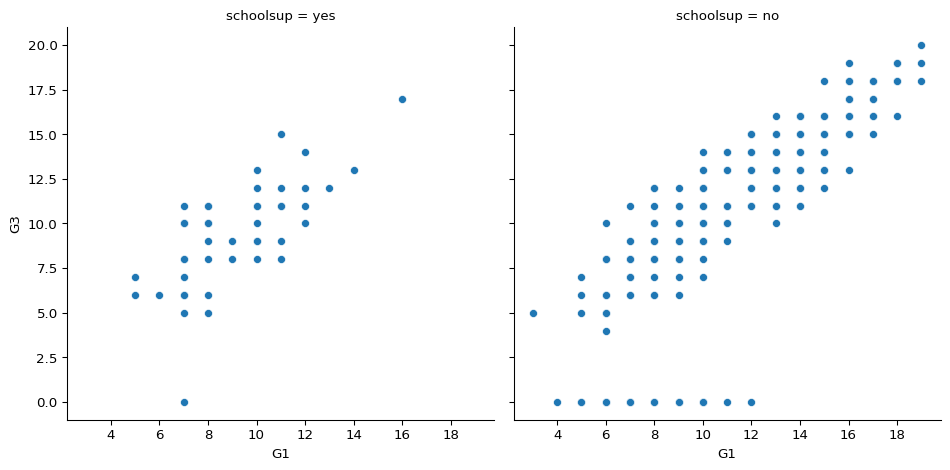

In [15]:
# Adjust to add subplots based on school support
sns.relplot(x='G1', y='G3',
            data=student_data,
            kind='scatter',
            col='schoolsup',
            col_order=['yes', 'no']
            )
# Show plot
plt.show()

3.  Añade subgrupos **de filas** en función de su el alumno recibió ayuda de la familia (`"famsup"`), ordenados de forma que "si" vaya antes que "no". Esto dará lugar a subtramas basadas en dos factores.

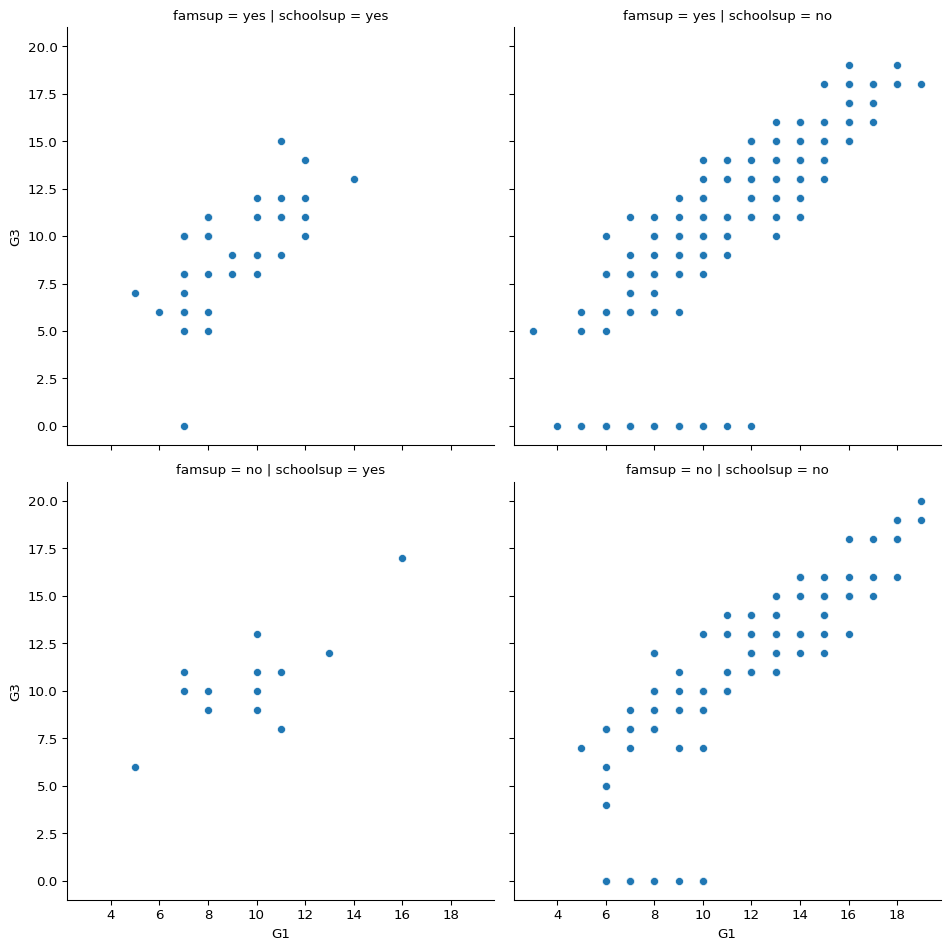

In [16]:
# Adjust further to add subplots based on family support
sns.relplot(x='G1', y='G3',
            data=student_data,
            kind='scatter',
            col='schoolsup',
            col_order=['yes', 'no'],
            row='famsup',
            row_order=['yes', 'no'])
# Show plot
plt.show()

Parece que la nota del primer semestre si correlaciona con la nota final, independientemente dl tipo de apoyo que recibió el estudiante.

## Personalizar gráficos de dispersión

-   Resumen Scatter plot
    -   Muestran la realción entre dos variables cuantitativas.
    -   Hemos visto:
        -   Subplots (`col` y `row`)
        -   Subgrupos con color (`hue`)
    -   Nuevas personalizaciones:
        -   Subgrupos con tamaño de punto y estilo.
        -   Cambio en la transparencia de los puntos.
    -   Se pueden utilizar en `scatterplot()` y `relplot()`
-   Subgrupos con tamaño de punto

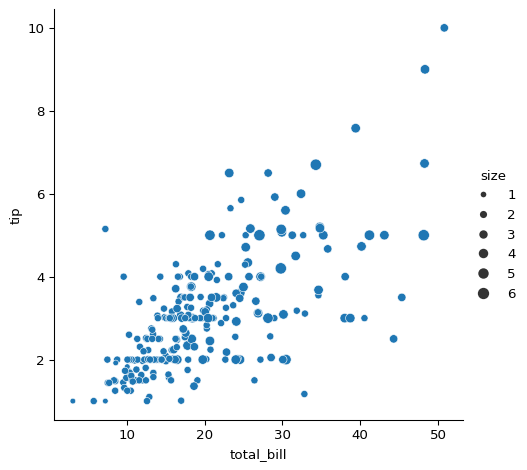

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(x='total_bill', y='tip',
            data=tips,
            kind='scatter',
            size='size')
plt.show()

El gráfico anterior es difícil de leer pues todos los puntos son del mismo color. Su visualización puede facilitarse utilizando lo siguiente:

-   Tamaño de punto y hue

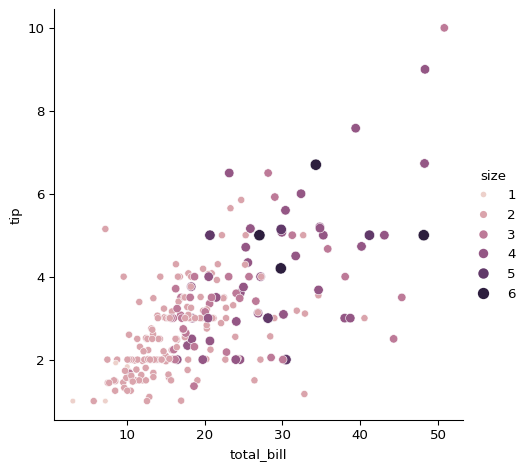

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(x='total_bill', y='tip',
            data=tips,
            kind='scatter',
            size='size',
            hue='size')
plt.show()

-   Subbrupos con estilo de punto

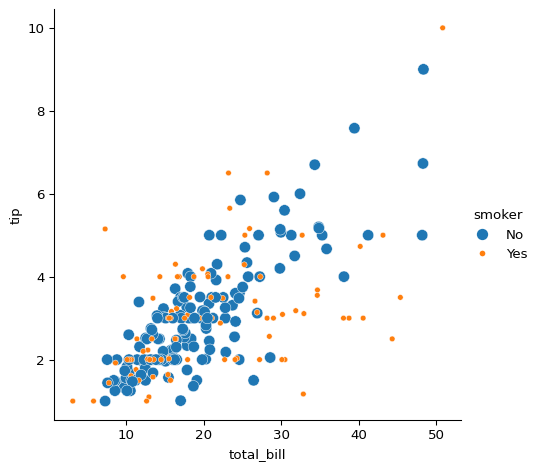

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(x='total_bill', y='tip',
            data=tips,
            kind='scatter',
            hue='smoker',
            size='smoker')
plt.show()

-   Cambiando la transparencia del punto

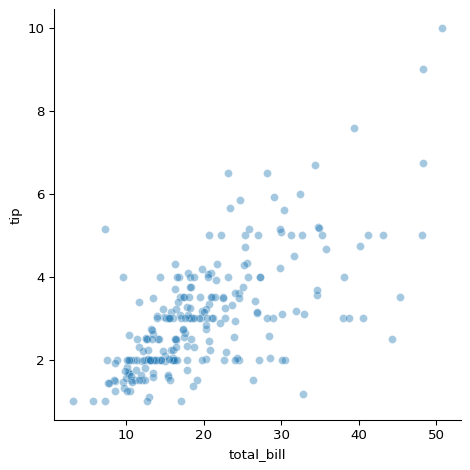

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set alpha to be between 0 and 1
sns.relplot(x='total_bill', y='tip',
            data=tips,
            kind='scatter',
            alpha=0.4)

plt.show()

Este último gráfico es muy útil cuando hay gran concentración de puntos

### Cambiar el tamaño de los puntos del diagrama del dispersión

En este ejercicio, exploraremos el conjunto de datos `mpg` de Seaborn, que contiene una fila por modelo de coche e incluye información como el año de fabricación del coche, el número de millas por galón ("M.P.G.") que alcanza, la potencia de su motor (medida en "caballos") y su país de origen.

¿Cuál es la relación entre la potencia del motor de un coche (`"horsepower"`) y su eficiencia de combustible (`"mpg"`)? ¿Y cómo varía esta relación según el número de cilindros (`"cylinders"`) que tenga el coche? Averigüémoslo.

Sigamos utilizando `relplot()` en lugar de `scatterplot()` ya que ofrece más flexibilidad.

In [21]:
import pandas as pd
mpg = pd.read_csv('./data/mpg.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


#### Instrucciones

1.  Utiliza `relplot()` y el DataFrame `mpg` para crear un gráfico de dispersión con `"horsepower"` en el eje x y `"mpg"` en el eje y. Varía el tamaño de los puntos según el número de cilindros del coche (`"cylinders"`).

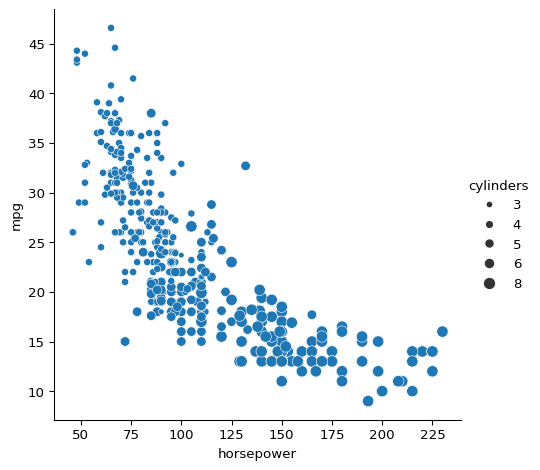

In [22]:
# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot of horsepower vs. mpg
sns.relplot(x='horsepower', y='mpg',
            data=mpg,
            kind='scatter',
            size='cylinders')
# Show plot
plt.show()

2.  Para que el gráfico se más fácil de leer, utiliza `hue` para variar el color de los puntos según el número de cilindros del coche (`"cylinders"`).

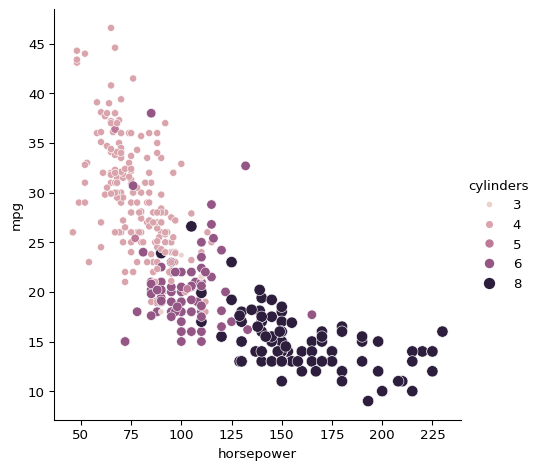

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x='horsepower', y='mpg',
            data=mpg,
            kind='scatter',
            size='cylinders',
            hue='cylinders')
# Show plot
plt.show()

Los coches con mayor potencia tienden a tener un menor número de millas por galón. También tienden a tener un mayor número de cilindros.

### Cambiar el estilo de los puntos del gráfico de dispersión

Sigamos explorando el conjunto de datos `mpg` de Seaborn observando la relación entre la velocidad a la que se puede acelerar un coche (`"acceleration"`) y su eficiencia de combustible (`"mpg"`). ¿Varían estas propiedades según el país de origen (`"origin"`)?

Observa que la variable `"acceleration"` es el tiempo de aceleración de 0 a 60 millas por hora, en segundos. Los valores más altos indican una aceleración más lenta.

#### Instrucciones

-   Utiliza `relplot()` y el DataFrame `mpg` para crear un gráfico de dispersión con `"acceleration"` en el eje x y `"mpg"` en el eje y. Varía el estilo y el color de los puntos de la trama según el país de origen (`"origin"`).

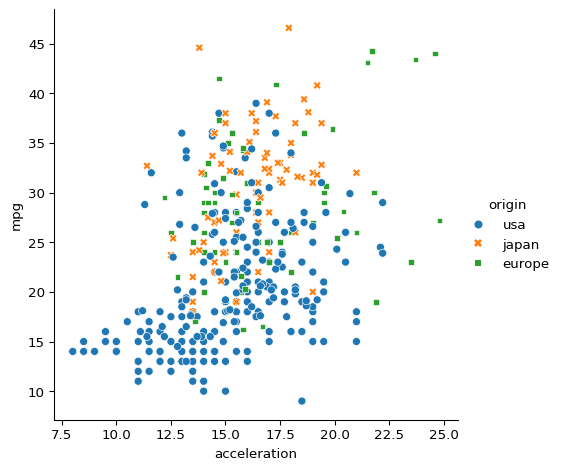

In [24]:
# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of acceleration vs. mpg
sns.relplot(x='acceleration', y='mpg',
            data=mpg,
            kind='scatter',
            style='origin',
            hue='origin')
# Show plot
plt.show()

Los coches de EE.UU tienden a acelerar más rápido y obtener menos millas por galón en comparación con los coches de Europa y Japón.

## Introducción a los gráficos lineales

-   Qué son los diagramas de lineas?
    -   Hay dos tipos de gráficos relacionales: scatterpltos y lineplots

    -   Scatterplots

        -   Cada punto en el gráfico es una observación independiente.

    -   Lineplots

        -   Cada punto representa la misma cosa, típicamente seguida por el tiempo.
-   Ejemplo de Scatterplot

In [25]:
#| eval: false
#| echo: true
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x='hour', y='NO_2_mean',
            data=air_df_mean,
            kind='scatter')
plt.show()

![](images/paste-1.png){width="370"}

-   Ejemplot de lineplot

In [26]:
#| eval: false
#| echo: true
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x='hour', y='NO_2_mean',
            data=air_df_mean,
            kind='Line')
plt.show()

![](images/paste-2.png){width="370"}

-   Subgrupos por localización

In [27]:
#| eval: false
#| echo: true
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x='hour', y='NO_2_mean',
            data=air_df_mean,
            kind='Line',
            style='location',
            hue='location')
plt.show()

![](images/paste-3.png){width="370"}

-   Añadiendo marcadores

In [28]:
#| eval: false
#| echo: true
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x='hour', y='NO_2_mean',
            data=air_df_mean,
            kind='Line',
            style='location',
            hue='location',
            markers=True)
plt.show()

![](images/paste-4.png){width="370"}

-   Apagando los estilos de líneas

In [29]:
#| eval: false
#| echo: true
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x='hour', y='NO_2_mean',
            data=air_df_mean,
            kind='Line',
            style='location',
            hue='location',
            markers=True,
            dashes=False)
plt.show()

![](images/paste-5.png){width="370"}

-   Múltiples observaciones por valor de x
    -   Scatter plot

In [30]:
#| echo: true
#| eval: false
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x='hour', y='NO_2',
            data=air_df,
            kind='scatter')

plt.show()

![](images/paste-6.png){width="370"}

-   Line plot

In [31]:
#| echo: true
#| eval: false
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x='hour', y='NO_2',
            data=air_df,
            kind='Line')

plt.show()

![](images/paste-7.png){width="378"}

```         
- La región sombreada es el intervalo de confianza
    - Asuma que el dataset es una muestra aleatoria
    - Hay 95% de confianza que la media está dentro de este intervalo.
    - Indicar la incertidumbre de nuestra estimación.
```

-   Reemplzando el intervalo de confianza con la desviación estándar.

In [32]:
#| echo: true
#| eval: false
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x='hour', y='NO_2',
            data=air_df,
            kind='line',
            ci='sd')
plt.show()

![](images/paste-8.png){width="370"}

-   Desactivando el intervalo de confianza

In [33]:
#| echo: true
#| eval: false
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x='hour', y='NO_2',
            data=air_df,
            kind='line',
            ci=None)
plt.show()

![](images/paste-9.png){width="370"}


### Interpretación de gráficos lineales

En este ejercicio, seguiremos explorando el conjunto de datos `mpg` de Seaborn, que contiene una fila por modelo de coche e incluye información como el año de fabricación del coche, su eficacia de combustible (medida en "millas por galón" o "M.P.G") y su país de origen (USA, Europa o Japón).

¿Cómo ha cambiado con el tiempo la media de millas por galón que alcanzan estos coches? ¡Utilicemos gráficos lineales para averiguarlo!

#### Instrucciones

1. Utiliza `relplot()` y el DataFrame `mpg` para crear un gráfico de líneas con `"model_year"` en el eje x y `"mpg"` en el eje y.


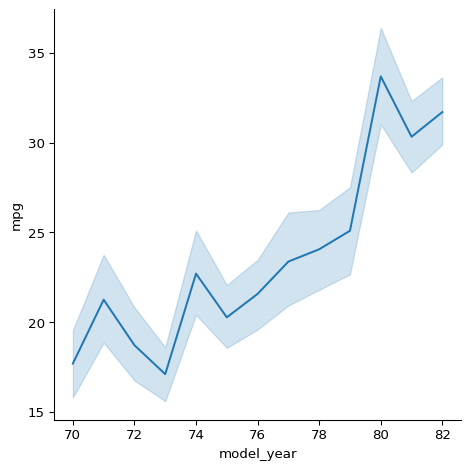

In [34]:
# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create a line plot
sns.relplot(x='model_year', y='mpg',
            data=mpg,
            kind='line')
# Show plot
plt.show()

2. **Preguntas**

¿Cuál de las siguientes no es una interpretación correcta de este gráfico?

**Respuestas posibles**

- [ ] El promedio de millas por galón ha aumentado generalmente con el tiempo.
- [X] La distribución de millas por galón es menor en 1973 que en 1977.
- [ ] El intervalo de confianza del 95 % para la media de millas por galón en 1970 es de aproximadamente 16 - 19,5 millas por galón.
- [ ] Este gráfico supone nuestros datos son una muestra aleatoria de todos los coches de US, Europa y Japón.

La región sombreada representa un intervalo de confianza para la media, no la distribución de las observaciones.


### Visualización de la desviación estándar con gráfico de líneas

En el último ejercicio, vimos cómo ha cambiado a lo largo del tiempo la media de millas por galón que alcanzan los coches. Ahora utilicemos un gráfico lineal para visualizar cómo ha cambiado la distribución de millas por galón a lo largo del tiempo.


#### Instrucciones

- Cambia el gráfico para que el área sombreada muestre la desviación estándar en lugar del intervalo de confianza para la media.

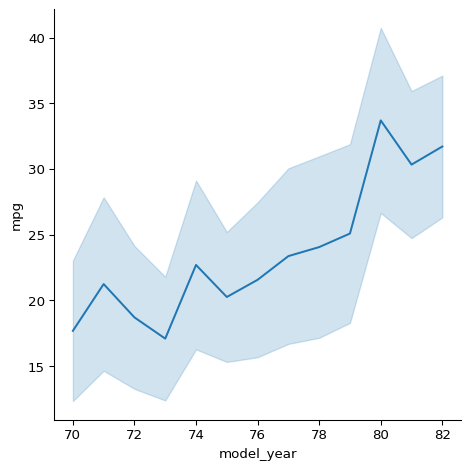

In [35]:
# Make the shaded area show the standard deviation
sns.relplot(x='model_year', y='mpg',
            data=mpg,
            kind='line',
            errorbar='sd') # el parámetro ci fue deprecado
# Show plot
plt.show()

A diferencia del gráfico en el último ejercicio, este gráfico nos muestra la distribución de millas por galón para todos los coches en cada año.

### Trazar subgrupos en gráficos de líneas

Sigamos examinando el conjunto de datos `mpg`. Hemos visto que la media de millas por galón de los coches ha aumentado con el tiempo, pero, ¿cómo ha cambiado la media de caballos de los coches con el tiempo? ¿Y difiere esta tendencia según el país de origen?

#### Instrucciones

1. Utiliza `relplot()` y el DataFrame `mpg` para crear un gráfico de líneas con `"model_year"` en el eje x y `"horse_power"` en el eje y. Desactiva los intervalos de confianza en el gráfico.


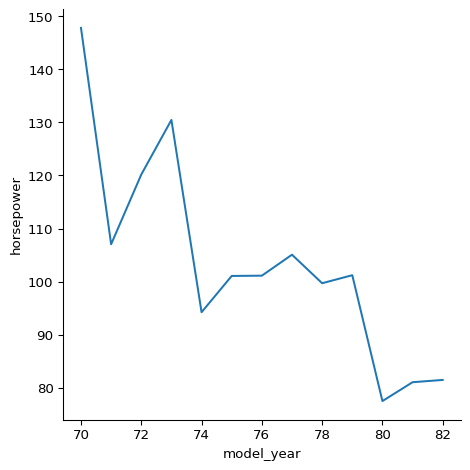

In [36]:
# Import matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create line plot of model year vs. horsepower
sns.relplot(x='model_year', y='horsepower',
            data=mpg,
            kind='line',
            errorbar=None)
# Show plot
plt.show()

2. Crea líneas diferentes para cada país (`"origin"`) que varíen tanto en estilo de línea como en color.


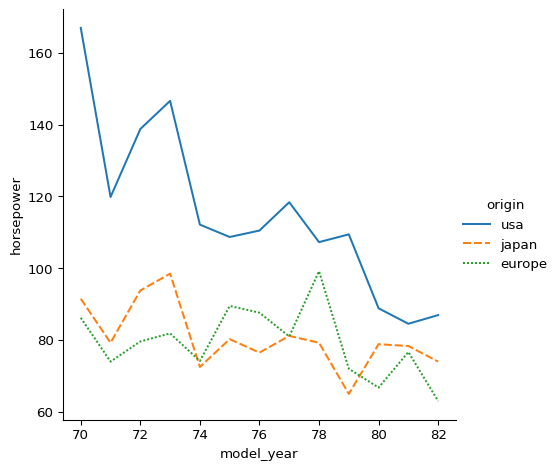

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create line plot of model year vs. horsepower
sns.relplot(x='model_year', y='horsepower',
            data=mpg,
            kind='line',
            errorbar=None,
            style='origin',
            hue='origin')
# Show plot
plt.show()

3. Añade marcadores para cada punto de datos a las líneas.

- Utiliza el parámetro `dashes` para utilizar líneas continuas para todos los países, permitiendo al mismo tiempo diferentes estilos de marcador para cada línea.


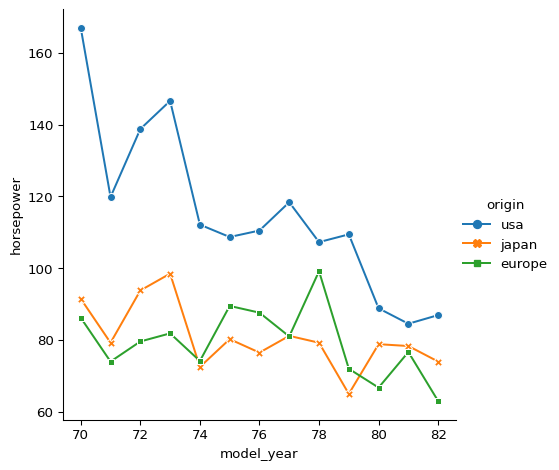

In [38]:
sns.relplot(x='model_year', y='horsepower',
            data=mpg,
            kind='line',
            errorbar=None,
            style='origin',
            hue='origin',
            markers=True,
            dashes=False)
# Show plot
plt.show()

Ahora hemos añadido subgrupos, podemos ver que esta tendencia a la baja en la potencia fue más pronunciada entre los coches de EE.UU.